# Phase 1

# DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df = pd.read_csv("neo_v2[1].csv")

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.shape

(90836, 10)

In [7]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

# **Data Cleaning**

1. Misssing Values: This dataset is report (or) is a record of all the asteroids, meteors, detached rocket particles drifting in space and revolving around earth’s orbit. There are no null, missing, and NaN values in this dataset. Some null are present in ‘Estimated diameter max’ column but these values are used for classification

2. Clear Formatting: We used clear formatting in our code to make the columns more readable and simplified to use in the EDA process, this process is also used to implement another data cleaning method (splitting).

3. Outliners: Outliners in the data are a separate set of data points which stays with the rest of the values, within the dataset the outliners can fluctuate the output. Outliners can be detected when abnormal distribution of data points occur (or) we can use boxplot function to detect the outliners. Here in our data we are removing 75% of the outliners because the data distribution is disturbed and the output graphs are being fluctuated.

 We used IQR method to split the outliners using quantile function

4. Splitting Columns: In our data-frame we are splitting columns into 2 and adding them to our dataset in order to perform further classification, categorical columns are being split into 2. By using this method we can understand the data properly.

5. Duplicate Entries: Our dataset does not have any duplicated values and if we had duplicate values they are important because our dataset is based on the micro details, even the decimals are important for the classification process because our dataset revolves around all the object that might hit the earth, so due to lack of visual observation of the tiny particles we rely on this data.

6. Inconsistent Data: Our dataset has many inconsistent data but these values are useful for further processing, for example in the column ‘Estimated diameter max’ there are similar values, NaN values all the values are replaced to 0 because the all the information missing in this column can be compensated from another column.

7. Data Transformation: This process is essential because our dataset contains over 90000 rows, all the EDA graphs should be plotted in a large scale all the graphs are skewed to the left and some are skewed to the right so we use log transformation to normalize the data and use this normalized data to plot graphs.

# **Missing Values**

In [8]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [9]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
df.isnull().sum()/(len(df))*100

id                    0.0
name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
orbiting_body         0.0
sentry_object         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

<AxesSubplot:>

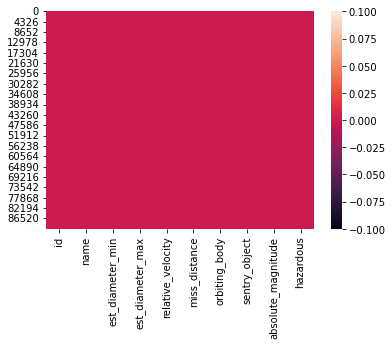

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# **Clear Formatting**

In [13]:
df.rename(columns={'id': 'ID'}, inplace=True)
df.head()

,ID,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [14]:
df.rename(columns={'name': 'Name'}, inplace=True)
df.head()

,ID,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [15]:
df.rename(columns={'est_diameter_min': 'Estimated_diameter_MIN'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [16]:
df.rename(columns={'est_diameter_max': 'Estimated_diameter_MAX'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [17]:
df.rename(columns={'sentry_object': 'Monitored_by_Sentry'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [18]:
cat_columns = df.select_dtypes(['object']).columns

df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [19]:
df['hazardous']

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [20]:
cat_columns = df.select_dtypes(['bool']).columns

df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [21]:
df

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,absolute_magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,629,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,0
90832,3837603,7599,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,0
90833,54017201,19445,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,0
90834,54115824,7737,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,0


In [22]:
df.apply(pd.to_numeric)

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,absolute_magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,629,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,0
90832,3837603,7599,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,0
90833,54017201,19445,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,0
90834,54115824,7737,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,0


In [23]:
df.rename(columns={'absolute_magnitude': 'Impact_Magnitude'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1


# **Outliners**

In [24]:
print(df.columns.unique())
print(df.columns.nunique())

Index(['ID', 'Name', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX',
       'relative_velocity', 'miss_distance', 'orbiting_body',
       'Monitored_by_Sentry', 'Impact_Magnitude', 'hazardous'],
      dtype='object')
10


In [25]:
categorical_columns=df.select_dtypes(include=['object']).columns
Numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Values:")
print(categorical_columns)
print("Numerical Values:")
print(Numerical_columns)

Categorical Values:
Index([], dtype='object')
Numerical Values:
['ID', 'Name', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX', 'relative_velocity', 'miss_distance', 'orbiting_body', 'Monitored_by_Sentry', 'Impact_Magnitude', 'hazardous']


<AxesSubplot:>

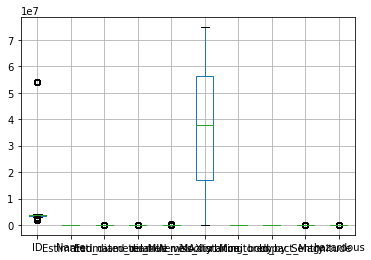

In [26]:
df.boxplot(Numerical_columns)

<AxesSubplot:>

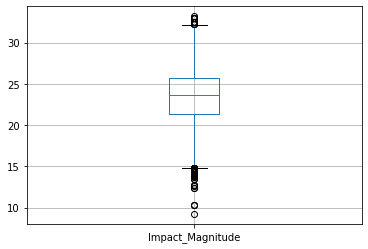

In [27]:
df.boxplot('Impact_Magnitude')

In [28]:
split1 = df['Impact_Magnitude'].quantile(0.25)
split2 = df['Impact_Magnitude'].quantile(0.75)

In [29]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Impact_Magnitude'] > Upper_bound]
df[df['Impact_Magnitude'] < Lower_bound]
new_df = df[df['Impact_Magnitude'] < Upper_bound]
new_df1 = df[df['Impact_Magnitude'] > Lower_bound]
new_df.shape
new_df1.shape

(22166, 10)

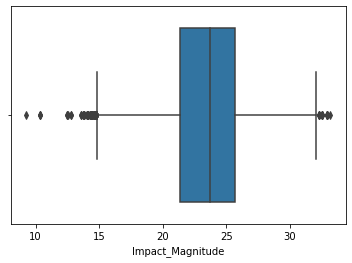

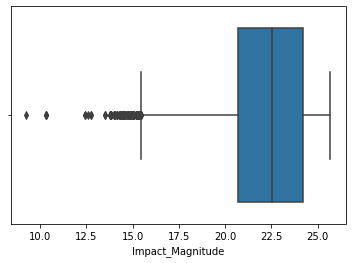

In [30]:
sns.boxplot(df['Impact_Magnitude'])
plt.show()
sns.boxplot(new_df['Impact_Magnitude'])
plt.show()

In [31]:
split1 = df['Estimated_diameter_MIN'].quantile(0.25)
split2 = df['Estimated_diameter_MIN'].quantile(0.75)

In [32]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Estimated_diameter_MIN'] > Upper_bound]
df[df['Estimated_diameter_MIN'] < Lower_bound]
new_df = df[df['Estimated_diameter_MIN'] < Upper_bound]
new_df.shape

(68095, 10)

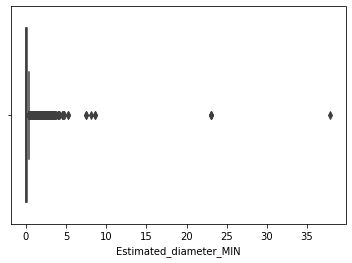

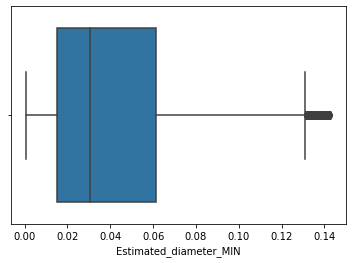

In [33]:
sns.boxplot(df['Estimated_diameter_MIN'])
plt.show()
sns.boxplot(new_df['Estimated_diameter_MIN'])
plt.show()

In [34]:
split1 = df['Estimated_diameter_MAX'].quantile(0.25)
split2 = df['Estimated_diameter_MAX'].quantile(0.75)

In [35]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Estimated_diameter_MAX'] > Upper_bound]
df[df['Estimated_diameter_MAX'] < Lower_bound]
new_df = df[df['Estimated_diameter_MAX'] < Upper_bound]
new_df1 = df[df['Estimated_diameter_MAX'] > Lower_bound]
new_df.shape
new_df1.shape

(22686, 10)

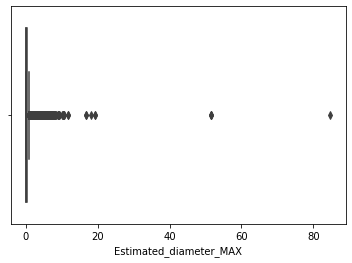

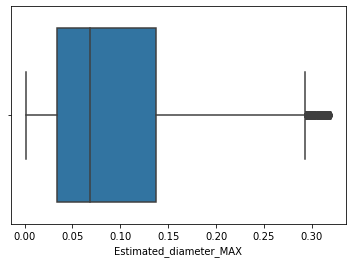

In [36]:
sns.boxplot(df['Estimated_diameter_MAX'])
plt.show()
sns.boxplot(new_df['Estimated_diameter_MAX'])
plt.show()

<AxesSubplot:>

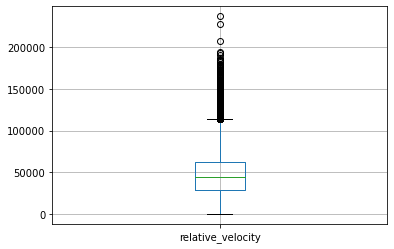

In [37]:
df.boxplot('relative_velocity')

In [38]:
split1 = df['relative_velocity'].quantile(0.25)
split2 = df['relative_velocity'].quantile(0.75)

In [39]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['relative_velocity'] > Upper_bound]
df[df['relative_velocity'] < Lower_bound]
new_df = df[df['relative_velocity'] < Upper_bound]
new_df.shape

(68127, 10)

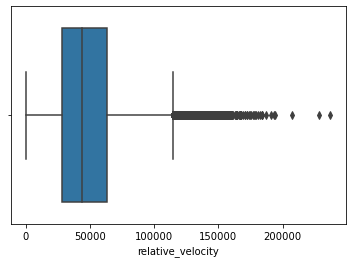

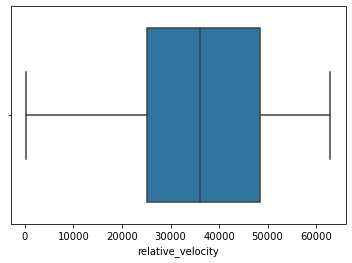

In [40]:
sns.boxplot(df['relative_velocity'])
plt.show()
sns.boxplot(new_df['relative_velocity'])
plt.show()

<AxesSubplot:>

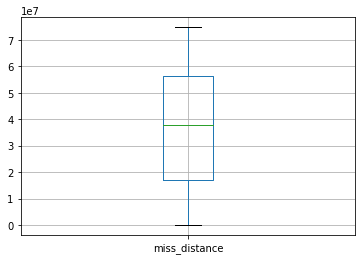

In [41]:
df.boxplot('miss_distance')

# **Duplicate Entries**

In [42]:
df_duplicated=df.drop_duplicates('Name')
df.duplicated('Name')

0        False
1        False
2        False
3        False
4        False
         ...  
90831     True
90832     True
90833     True
90834     True
90835     True
Length: 90836, dtype: bool

In [43]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Length: 90836, dtype: bool

# **Inconsistent Data**

In [44]:
df.describe()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
count,9.083600e+04,90836.000000,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.0,90836.0,90836.000000,90836.000000
mean,1.438288e+07,9124.264730,0.127432,0.284947,48066.918918,3.706655e+07,0.0,0.0,23.527103,0.097318
std,2.087202e+07,7104.415027,0.298511,0.667491,25293.296961,2.235204e+07,0.0,0.0,2.894086,0.296392
min,2.000433e+06,0.000000,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,3.448110e+06,3176.000000,0.019256,0.043057,28619.020645,1.721082e+07,0.0,0.0,21.340000,0.000000
50%,3.748362e+06,7393.000000,0.048368,0.108153,44190.117890,3.784658e+07,0.0,0.0,23.700000,0.000000
75%,3.884023e+06,14127.250000,0.143402,0.320656,62923.604633,5.654900e+07,0.0,0.0,25.700000,0.000000
max,5.427591e+07,27422.000000,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


In [45]:
df['ID'].value_counts(dropna=False)

2469219    43
2277810    43
3743123    40
2138175    39
3893865    38
           ..
3768019     1
3774692     1
3779049     1
3775040     1
3092229     1
Name: ID, Length: 27423, dtype: int64

In [46]:
df['miss_distance'].value_counts(dropna=False)

5.603158e+07    2
7.001952e+07    2
4.926247e+07    2
9.079336e+06    2
5.178607e+07    2
               ..
4.460245e+07    1
3.311994e+07    1
2.283126e+07    1
3.238010e+07    1
5.977213e+07    1
Name: miss_distance, Length: 90536, dtype: int64

In [47]:
df['relative_velocity'].value_counts(dropna=False)

34485.841845     2
25338.439042     2
37225.231825     2
36419.712852     2
66082.373737     2
                ..
102750.018447    1
27858.417772     1
18156.451169     1
18470.701216     1
27024.455553     1
Name: relative_velocity, Length: 90828, dtype: int64

In [48]:
df.drop_duplicates()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,629,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,0
90832,3837603,7599,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,0
90833,54017201,19445,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,0
90834,54115824,7737,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,0


In [49]:
df.fillna(0)

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,629,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,0
90832,3837603,7599,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,0
90833,54017201,19445,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,0
90834,54115824,7737,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,0


In [50]:
df['miss_distance']=df['miss_distance'].astype(float).replace('\0',regex=True)

In [51]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1


# **DATA TRANSFORMATION**

In [52]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['Estimated_diameter_MIN','Estimated_diameter_MAX'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  int64  
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  int64  
 7   Monitored_by_Sentry         90836 non-null  int64  
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  int64  
 10  Estimated_diameter_MIN_log  90836 non-null  float64
 11  Estimated_diameter_MAX_log  90836 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 8.3 MB


In [53]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['relative_velocity','miss_distance'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  int64  
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  int64  
 7   Monitored_by_Sentry         90836 non-null  int64  
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  int64  
 10  Estimated_diameter_MIN_log  90836 non-null  float64
 11  Estimated_diameter_MAX_log  90836 non-null  float64
 12  relative_velocity_log       90836 non-null  float64
 13  miss_distance_log           908

In [54]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['Impact_Magnitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  int64  
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  int64  
 7   Monitored_by_Sentry         90836 non-null  int64  
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  int64  
 10  Estimated_diameter_MIN_log  90836 non-null  float64
 11  Estimated_diameter_MAX_log  90836 non-null  float64
 12  relative_velocity_log       90836 non-null  float64
 13  miss_distance_log           908

In [55]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Estimated_diameter_MIN_log,Estimated_diameter_MAX_log,relative_velocity_log,miss_distance_log,Impact_Magnitude_log
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0,0.180880,0.985598,9.515561,17.819926,2.817204
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1,-1.325011,-0.520292,11.206247,17.933541,2.995732
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0,-0.325689,0.479030,11.646220,17.723500,2.880882
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0,-2.338149,-1.533430,10.117159,17.051636,3.100092
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1,-1.366458,-0.561739,10.662838,17.650125,3.000222


<AxesSubplot:xlabel='Estimated_diameter_MAX_log', ylabel='Density'>

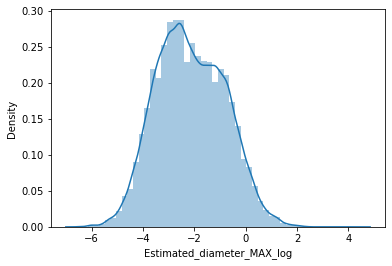

In [56]:
sns.distplot(df['Estimated_diameter_MAX_log'])

<AxesSubplot:xlabel='Estimated_diameter_MIN_log', ylabel='Density'>

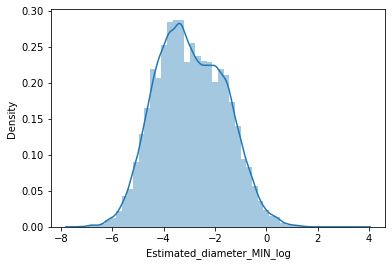

In [57]:
sns.distplot(df['Estimated_diameter_MIN_log'])

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Density'>

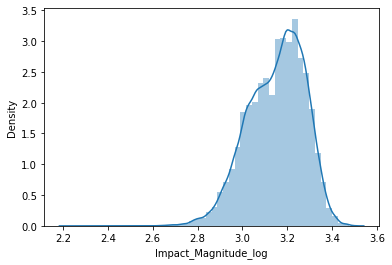

In [58]:
sns.distplot(df['Impact_Magnitude_log'])

# **EDA(Explanatory Data Analysis) Univariate Analysis**

In [59]:
categorical_columns=df.select_dtypes(include=['object']).columns
Numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Values:")
print(categorical_columns)
print("Numerical Values:")
print(Numerical_columns)

Categorical Values:
Index([], dtype='object')
Numerical Values:
['ID', 'Name', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX', 'relative_velocity', 'miss_distance', 'orbiting_body', 'Monitored_by_Sentry', 'Impact_Magnitude', 'hazardous', 'Estimated_diameter_MIN_log', 'Estimated_diameter_MAX_log', 'relative_velocity_log', 'miss_distance_log', 'Impact_Magnitude_log']


In [60]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
Name,90836.0,9.124265e+03,7.104415e+03,0.000000e+00,3.176000e+03,7.393000e+03,1.412725e+04,2.742200e+04
Estimated_diameter_MIN,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
Estimated_diameter_MAX,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
orbiting_body,90836.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Monitored_by_Sentry,90836.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Impact_Magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01
hazardous,90836.0,9.731824e-02,2.963923e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


# **BOX PLOT**

ID
1.38


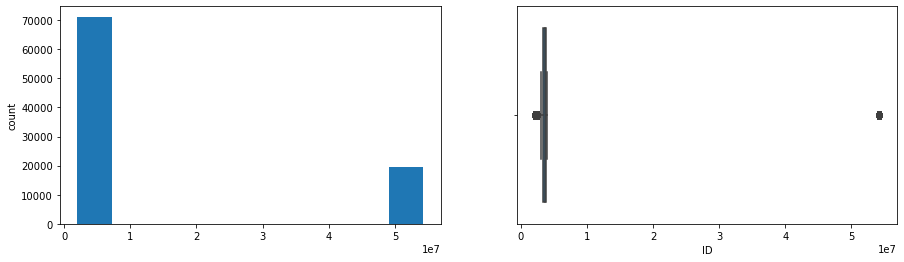

Name
0.72


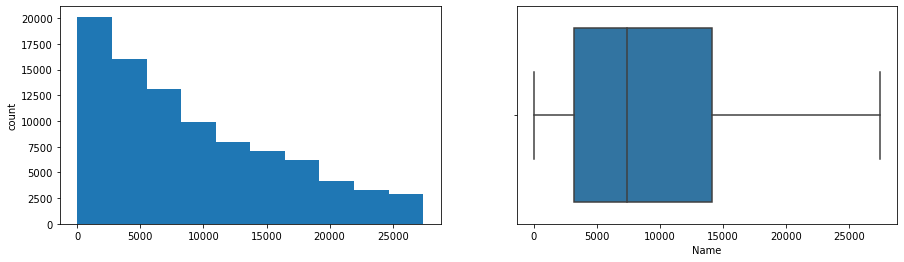

Estimated_diameter_MIN
41.14


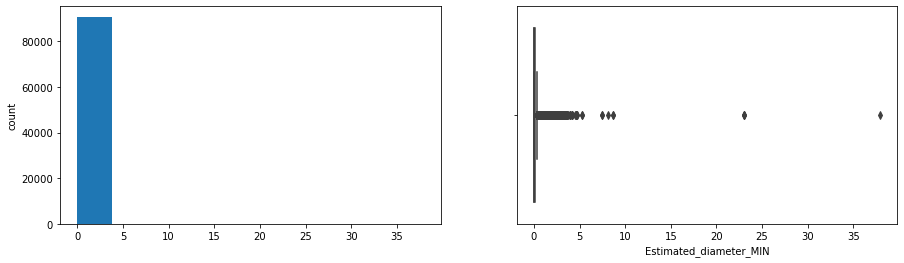

Estimated_diameter_MAX
41.14


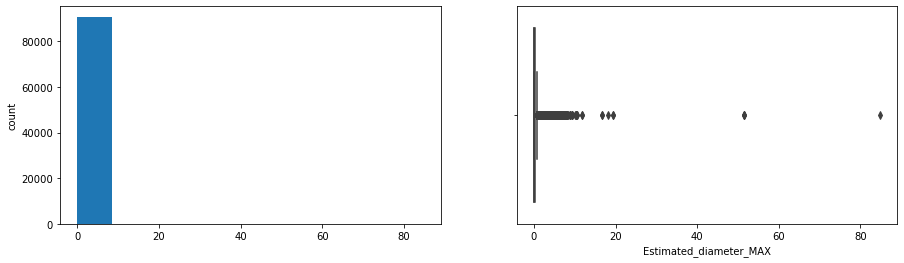

relative_velocity
0.91


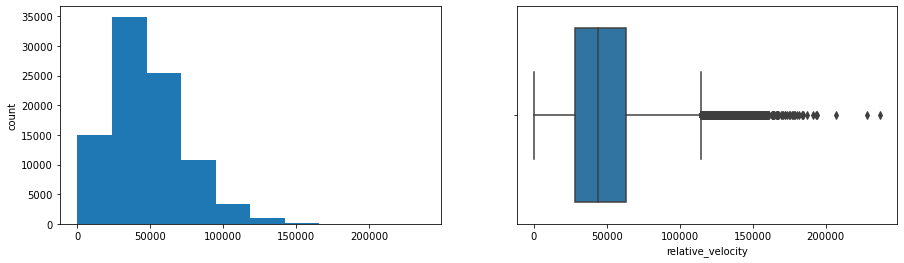

miss_distance
-0.04


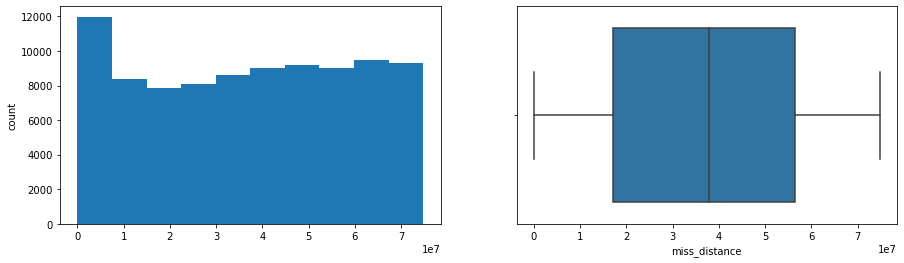

orbiting_body
0


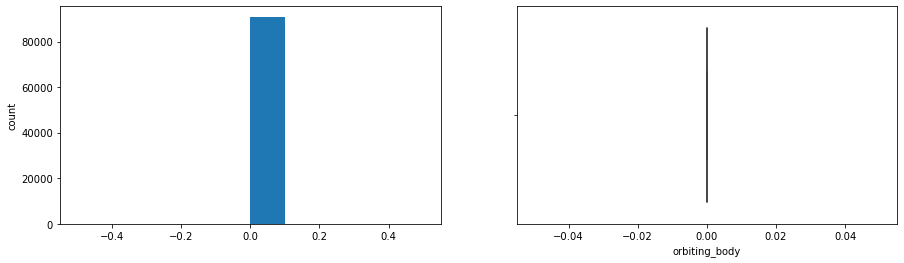

Monitored_by_Sentry
0


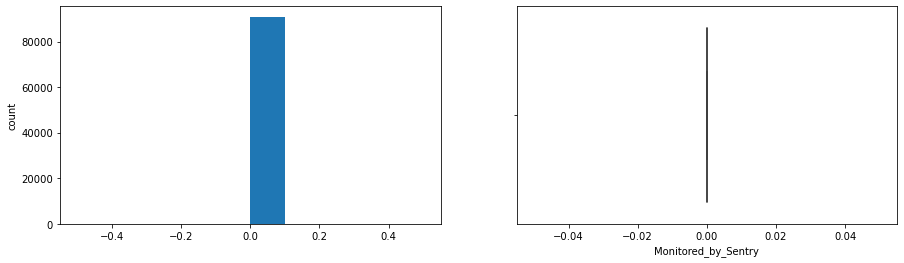

Impact_Magnitude
-0.14


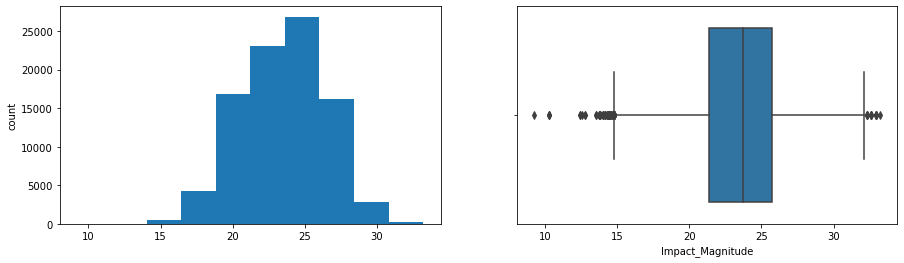

hazardous
2.72


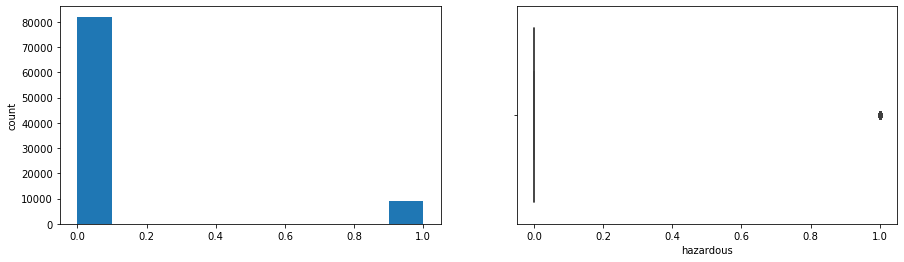

Estimated_diameter_MIN_log
0.14


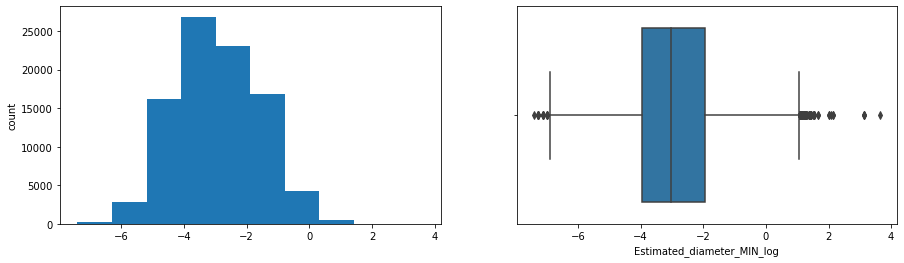

Estimated_diameter_MAX_log
0.14


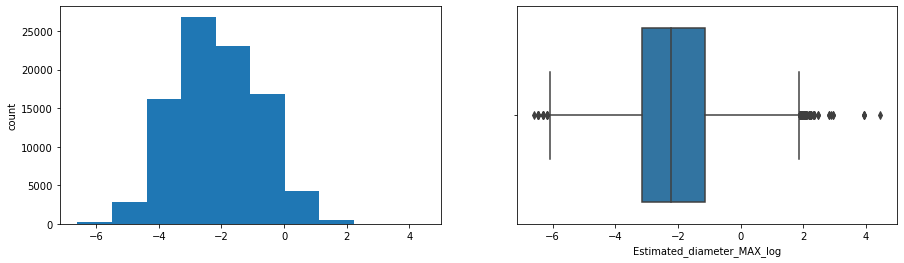

relative_velocity_log
-0.69


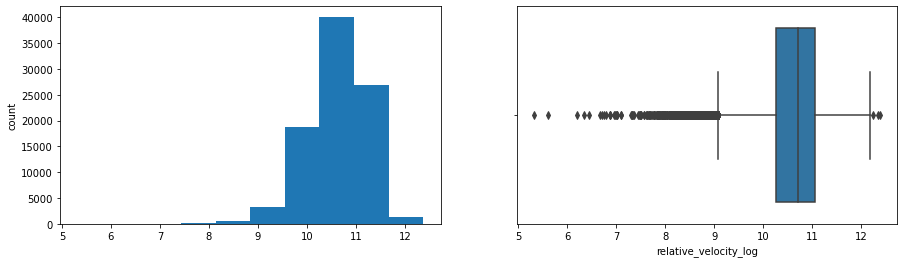

miss_distance_log
-1.9


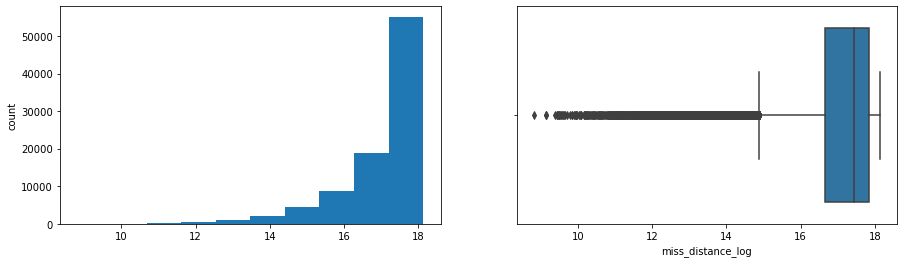

Impact_Magnitude_log
-0.45


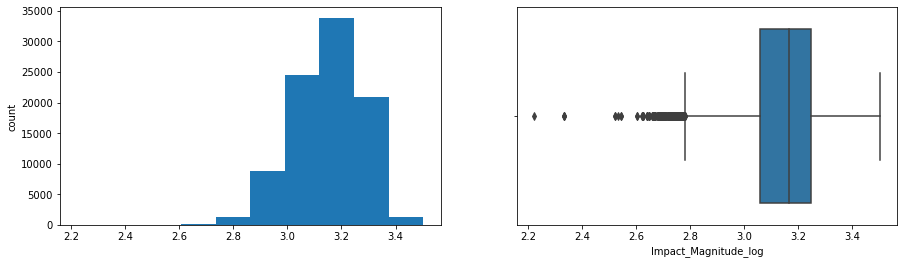

In [61]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[Columns1])
    plt.show()

# **HISTOGRAM**

ID
1.38


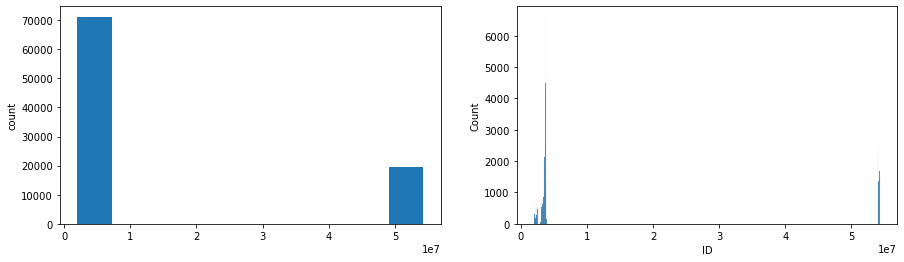

Name
0.72


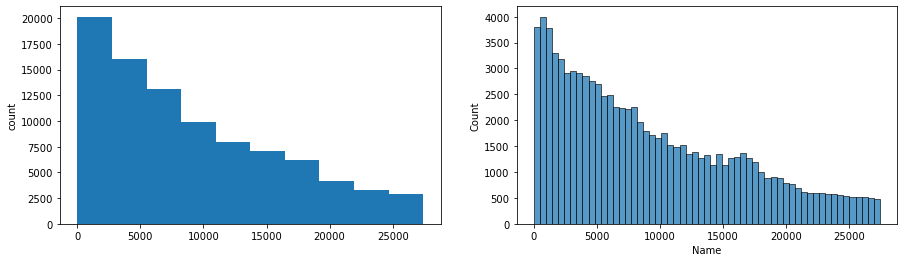

Estimated_diameter_MIN
41.14


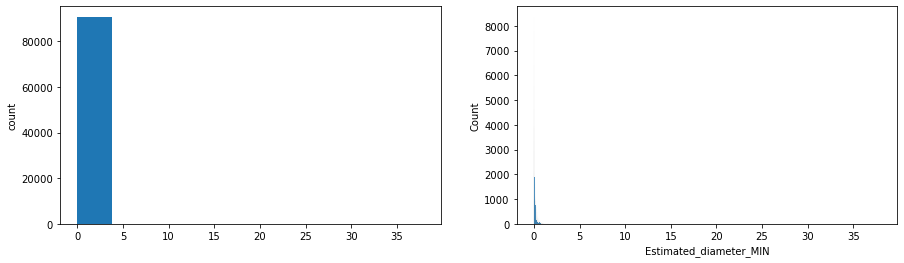

Estimated_diameter_MAX
41.14


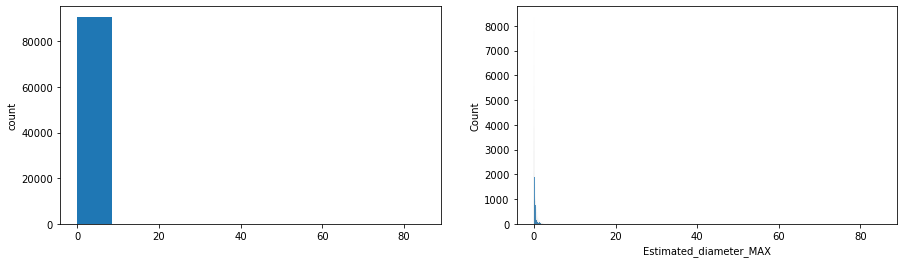

relative_velocity
0.91


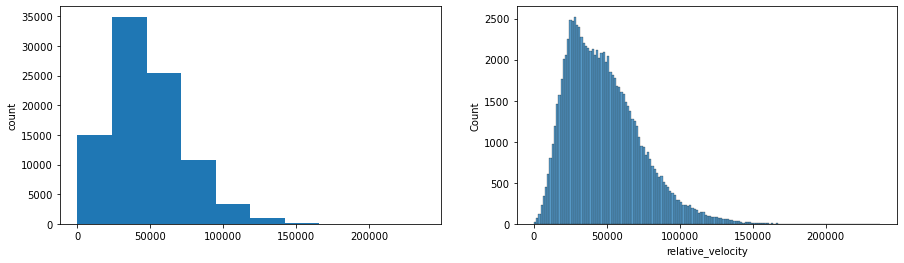

miss_distance
-0.04


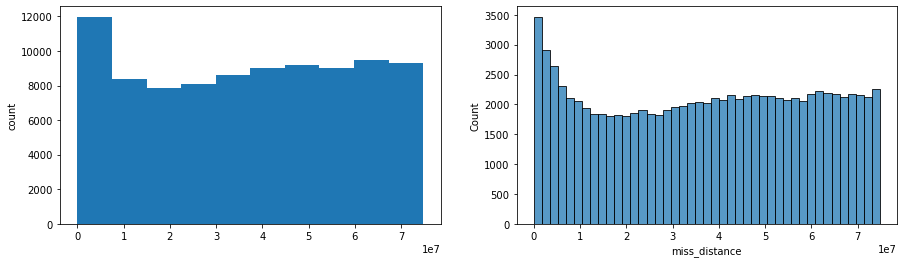

orbiting_body
0


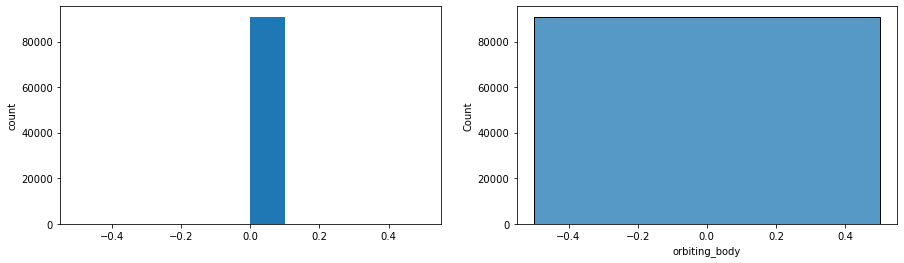

Monitored_by_Sentry
0


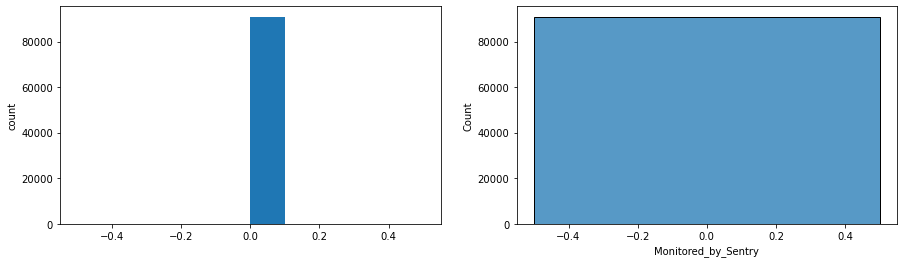

Impact_Magnitude
-0.14


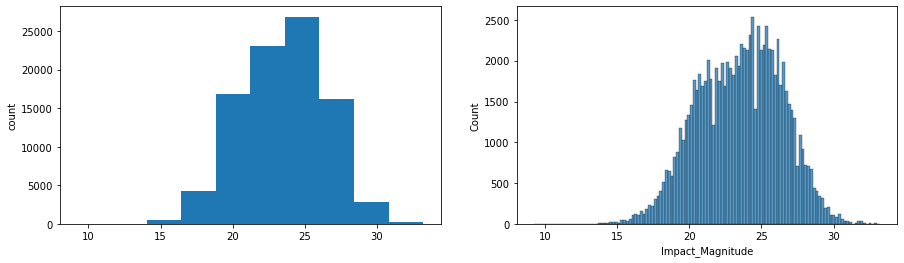

hazardous
2.72


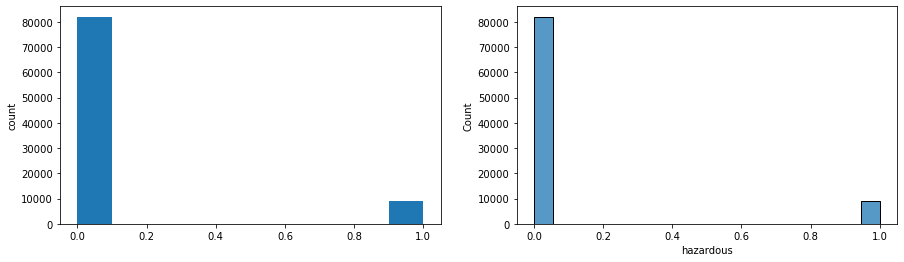

Estimated_diameter_MIN_log
0.14


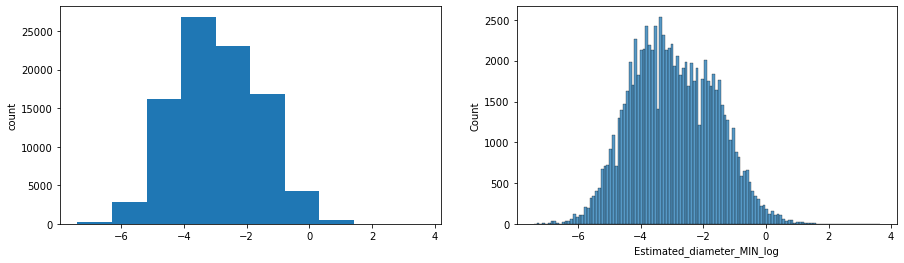

Estimated_diameter_MAX_log
0.14


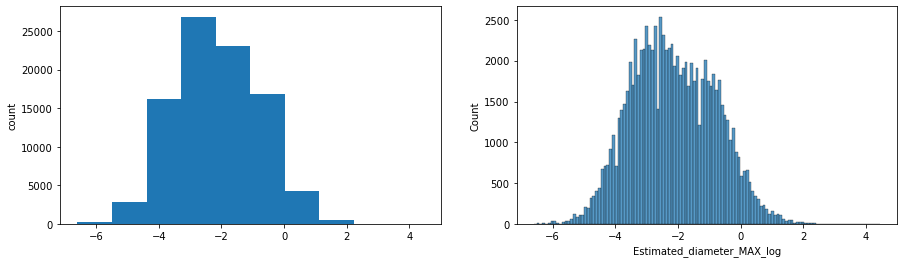

relative_velocity_log
-0.69


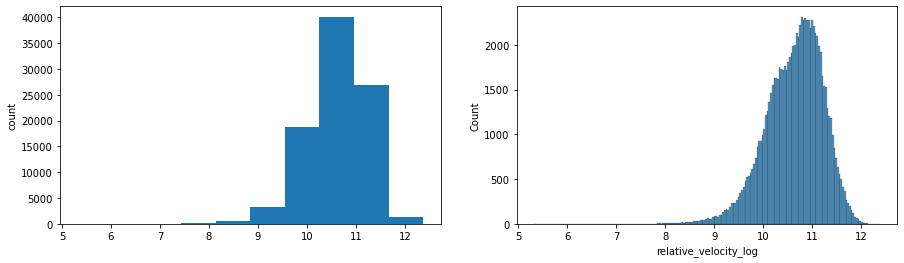

miss_distance_log
-1.9


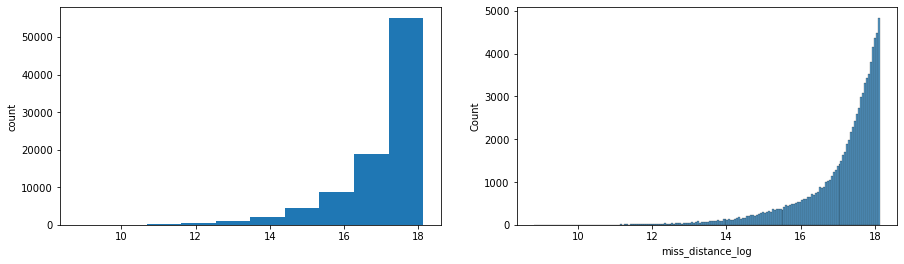

Impact_Magnitude_log
-0.45


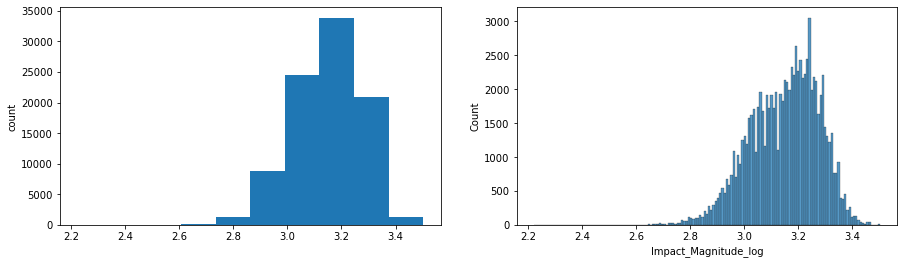

In [62]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.histplot(x=df[Columns1])
    plt.show()

# **DENSITY PLOT**

ID
1.38


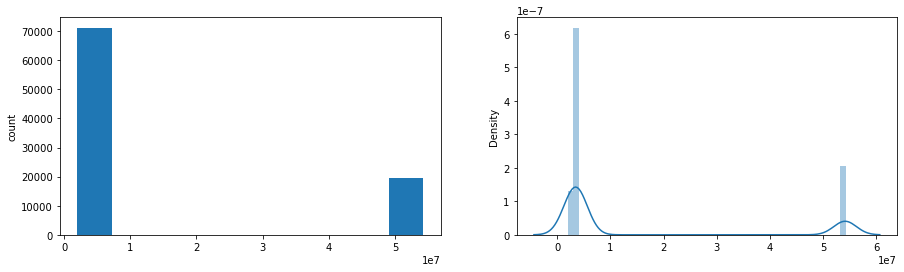

Name
0.72


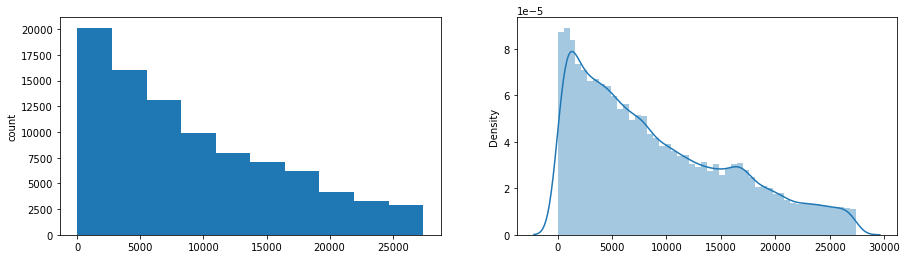

Estimated_diameter_MIN
41.14


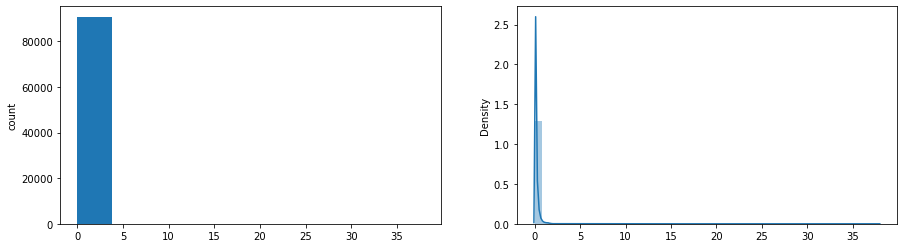

Estimated_diameter_MAX
41.14


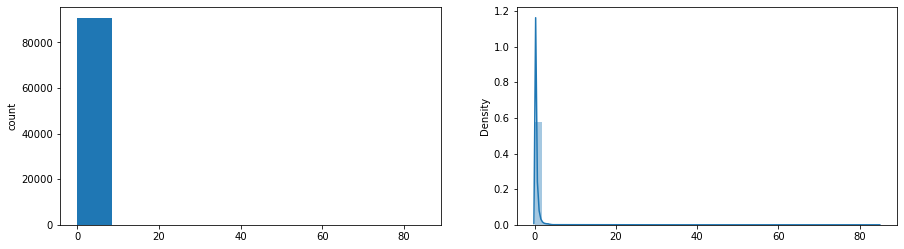

relative_velocity
0.91


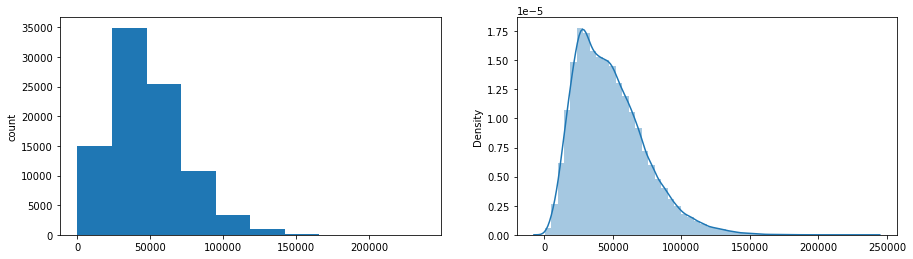

miss_distance
-0.04


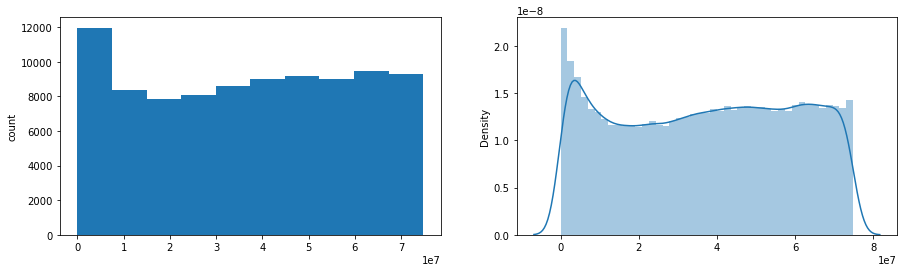

orbiting_body
0


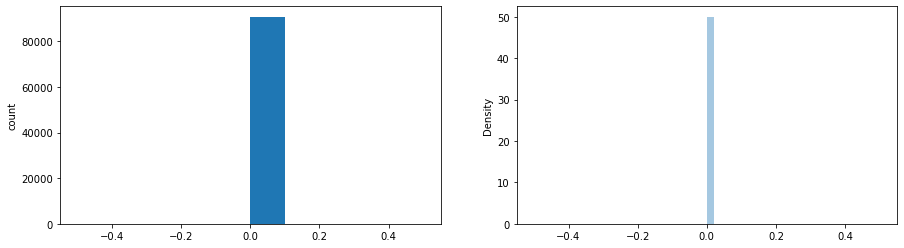

Monitored_by_Sentry
0


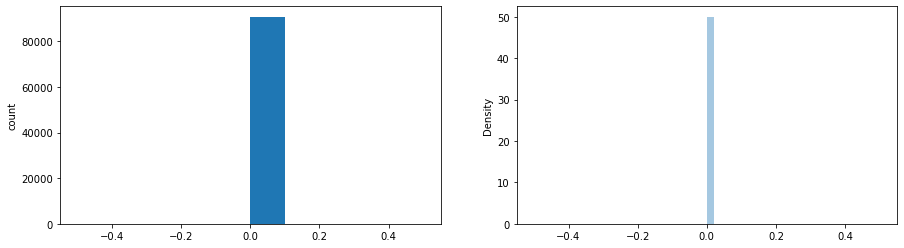

Impact_Magnitude
-0.14


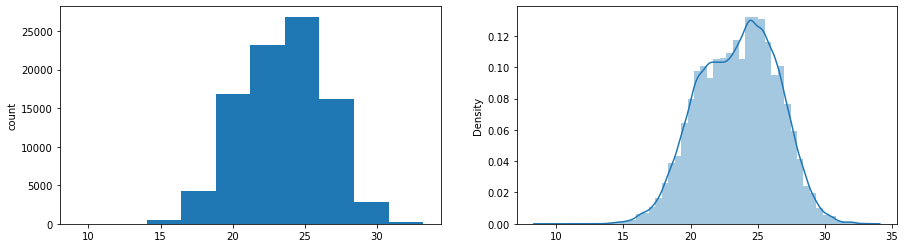

hazardous
2.72


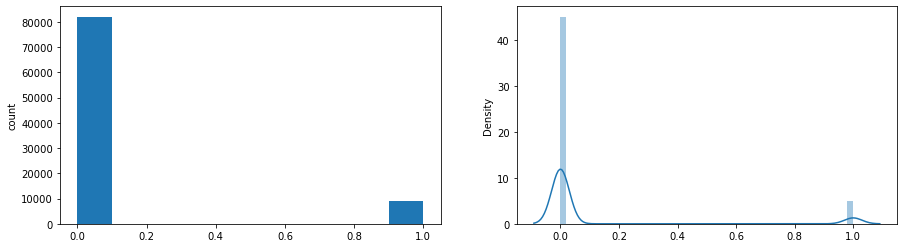

Estimated_diameter_MIN_log
0.14


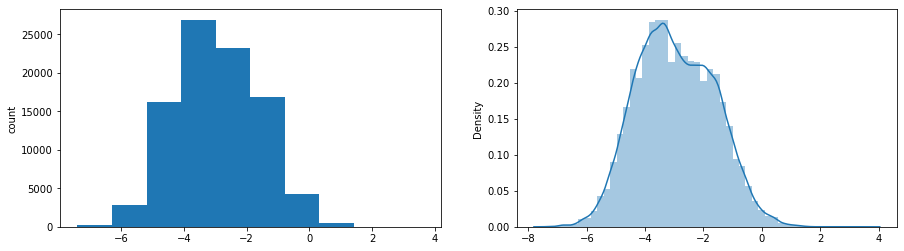

Estimated_diameter_MAX_log
0.14


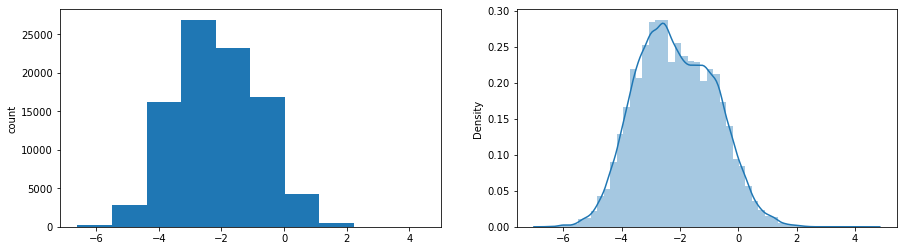

relative_velocity_log
-0.69


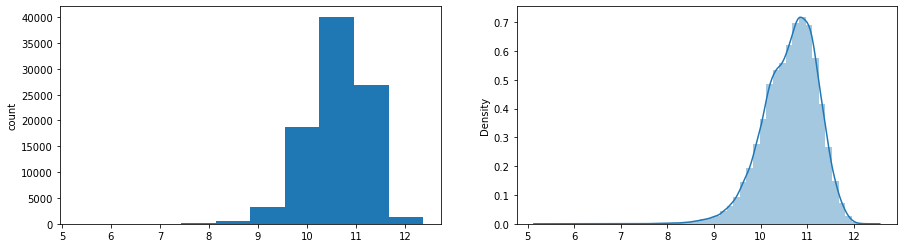

miss_distance_log
-1.9


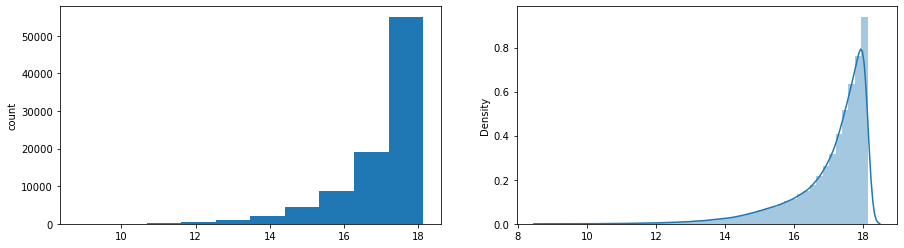

Impact_Magnitude_log
-0.45


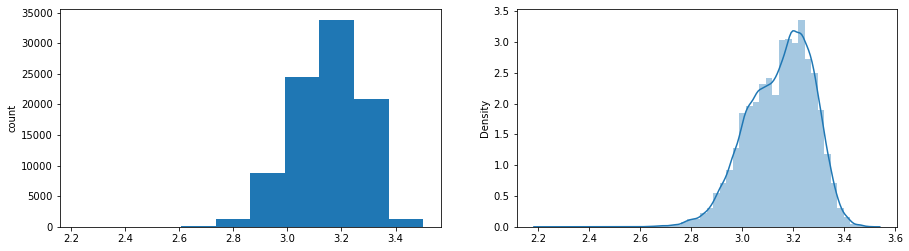

In [63]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.distplot(x=df[Columns1])
    plt.show()

# **EDA (Exploratory Data Analysis) BIVARIATE ANALYSIS**

In [64]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Estimated_diameter_MIN_log,Estimated_diameter_MAX_log,relative_velocity_log,miss_distance_log,Impact_Magnitude_log
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0,0.180880,0.985598,9.515561,17.819926,2.817204
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1,-1.325011,-0.520292,11.206247,17.933541,2.995732
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0,-0.325689,0.479030,11.646220,17.723500,2.880882
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0,-2.338149,-1.533430,10.117159,17.051636,3.100092
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1,-1.366458,-0.561739,10.662838,17.650125,3.000222


# **POINT PLOT**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

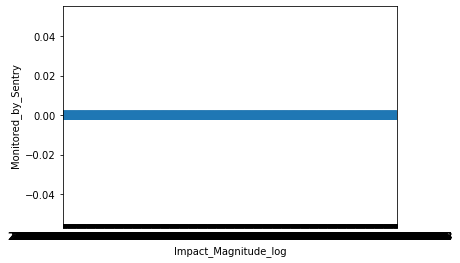

In [65]:
sns.pointplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

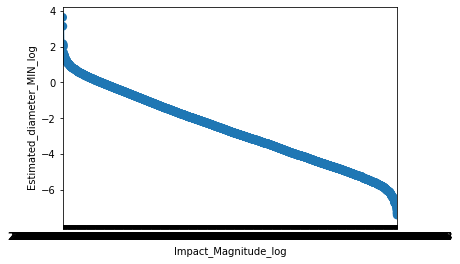

In [66]:
sns.pointplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

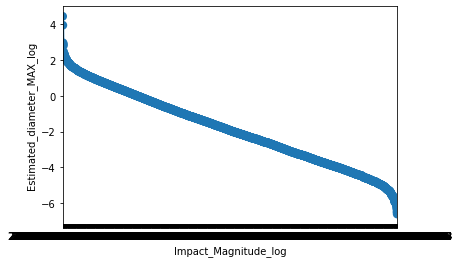

In [67]:
sns.pointplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

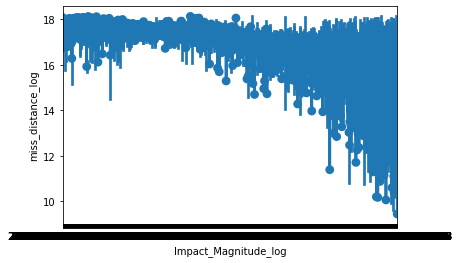

In [68]:
sns.pointplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='relative_velocity_log'>

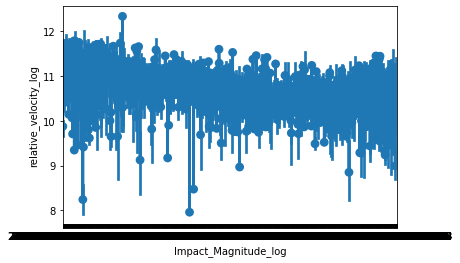

In [69]:
sns.pointplot(x='Impact_Magnitude_log',y='relative_velocity_log',data=df) 

# **REGRESSION PLOT**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

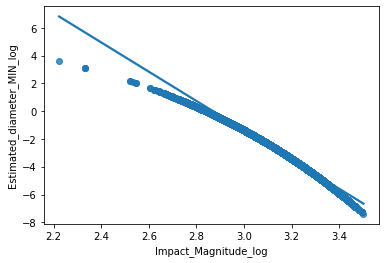

In [70]:
sns.regplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

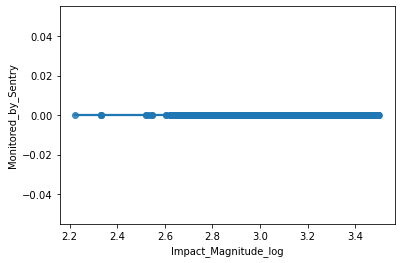

In [71]:
sns.regplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity', ylabel='Monitored_by_Sentry'>

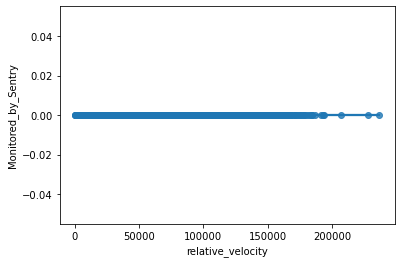

In [72]:
sns.regplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity_log', ylabel='miss_distance'>

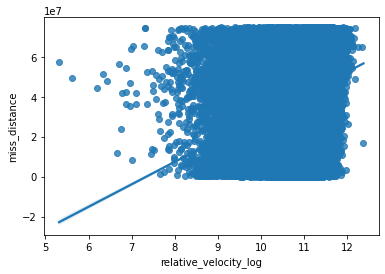

In [73]:
sns.regplot(x='relative_velocity_log',y='miss_distance',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

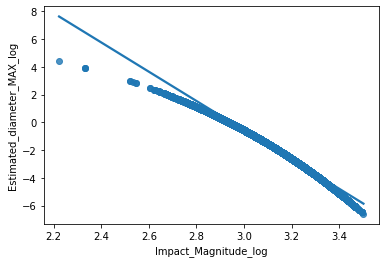

In [74]:
sns.regplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

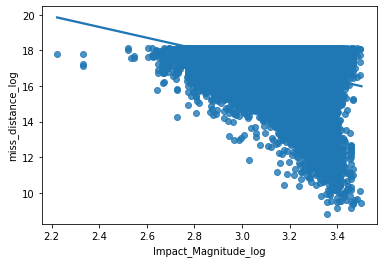

In [75]:
sns.regplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='miss_distance_log', ylabel='Estimated_diameter_MAX_log'>

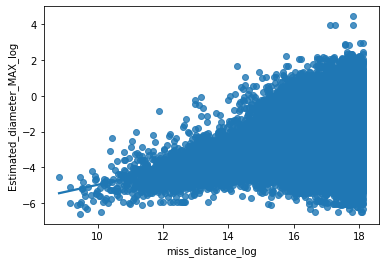

In [76]:
sns.regplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

# **EDA (Exploratory Data Analysis) MULTIVARIATE ANALYSIS**

# **Pairplot**

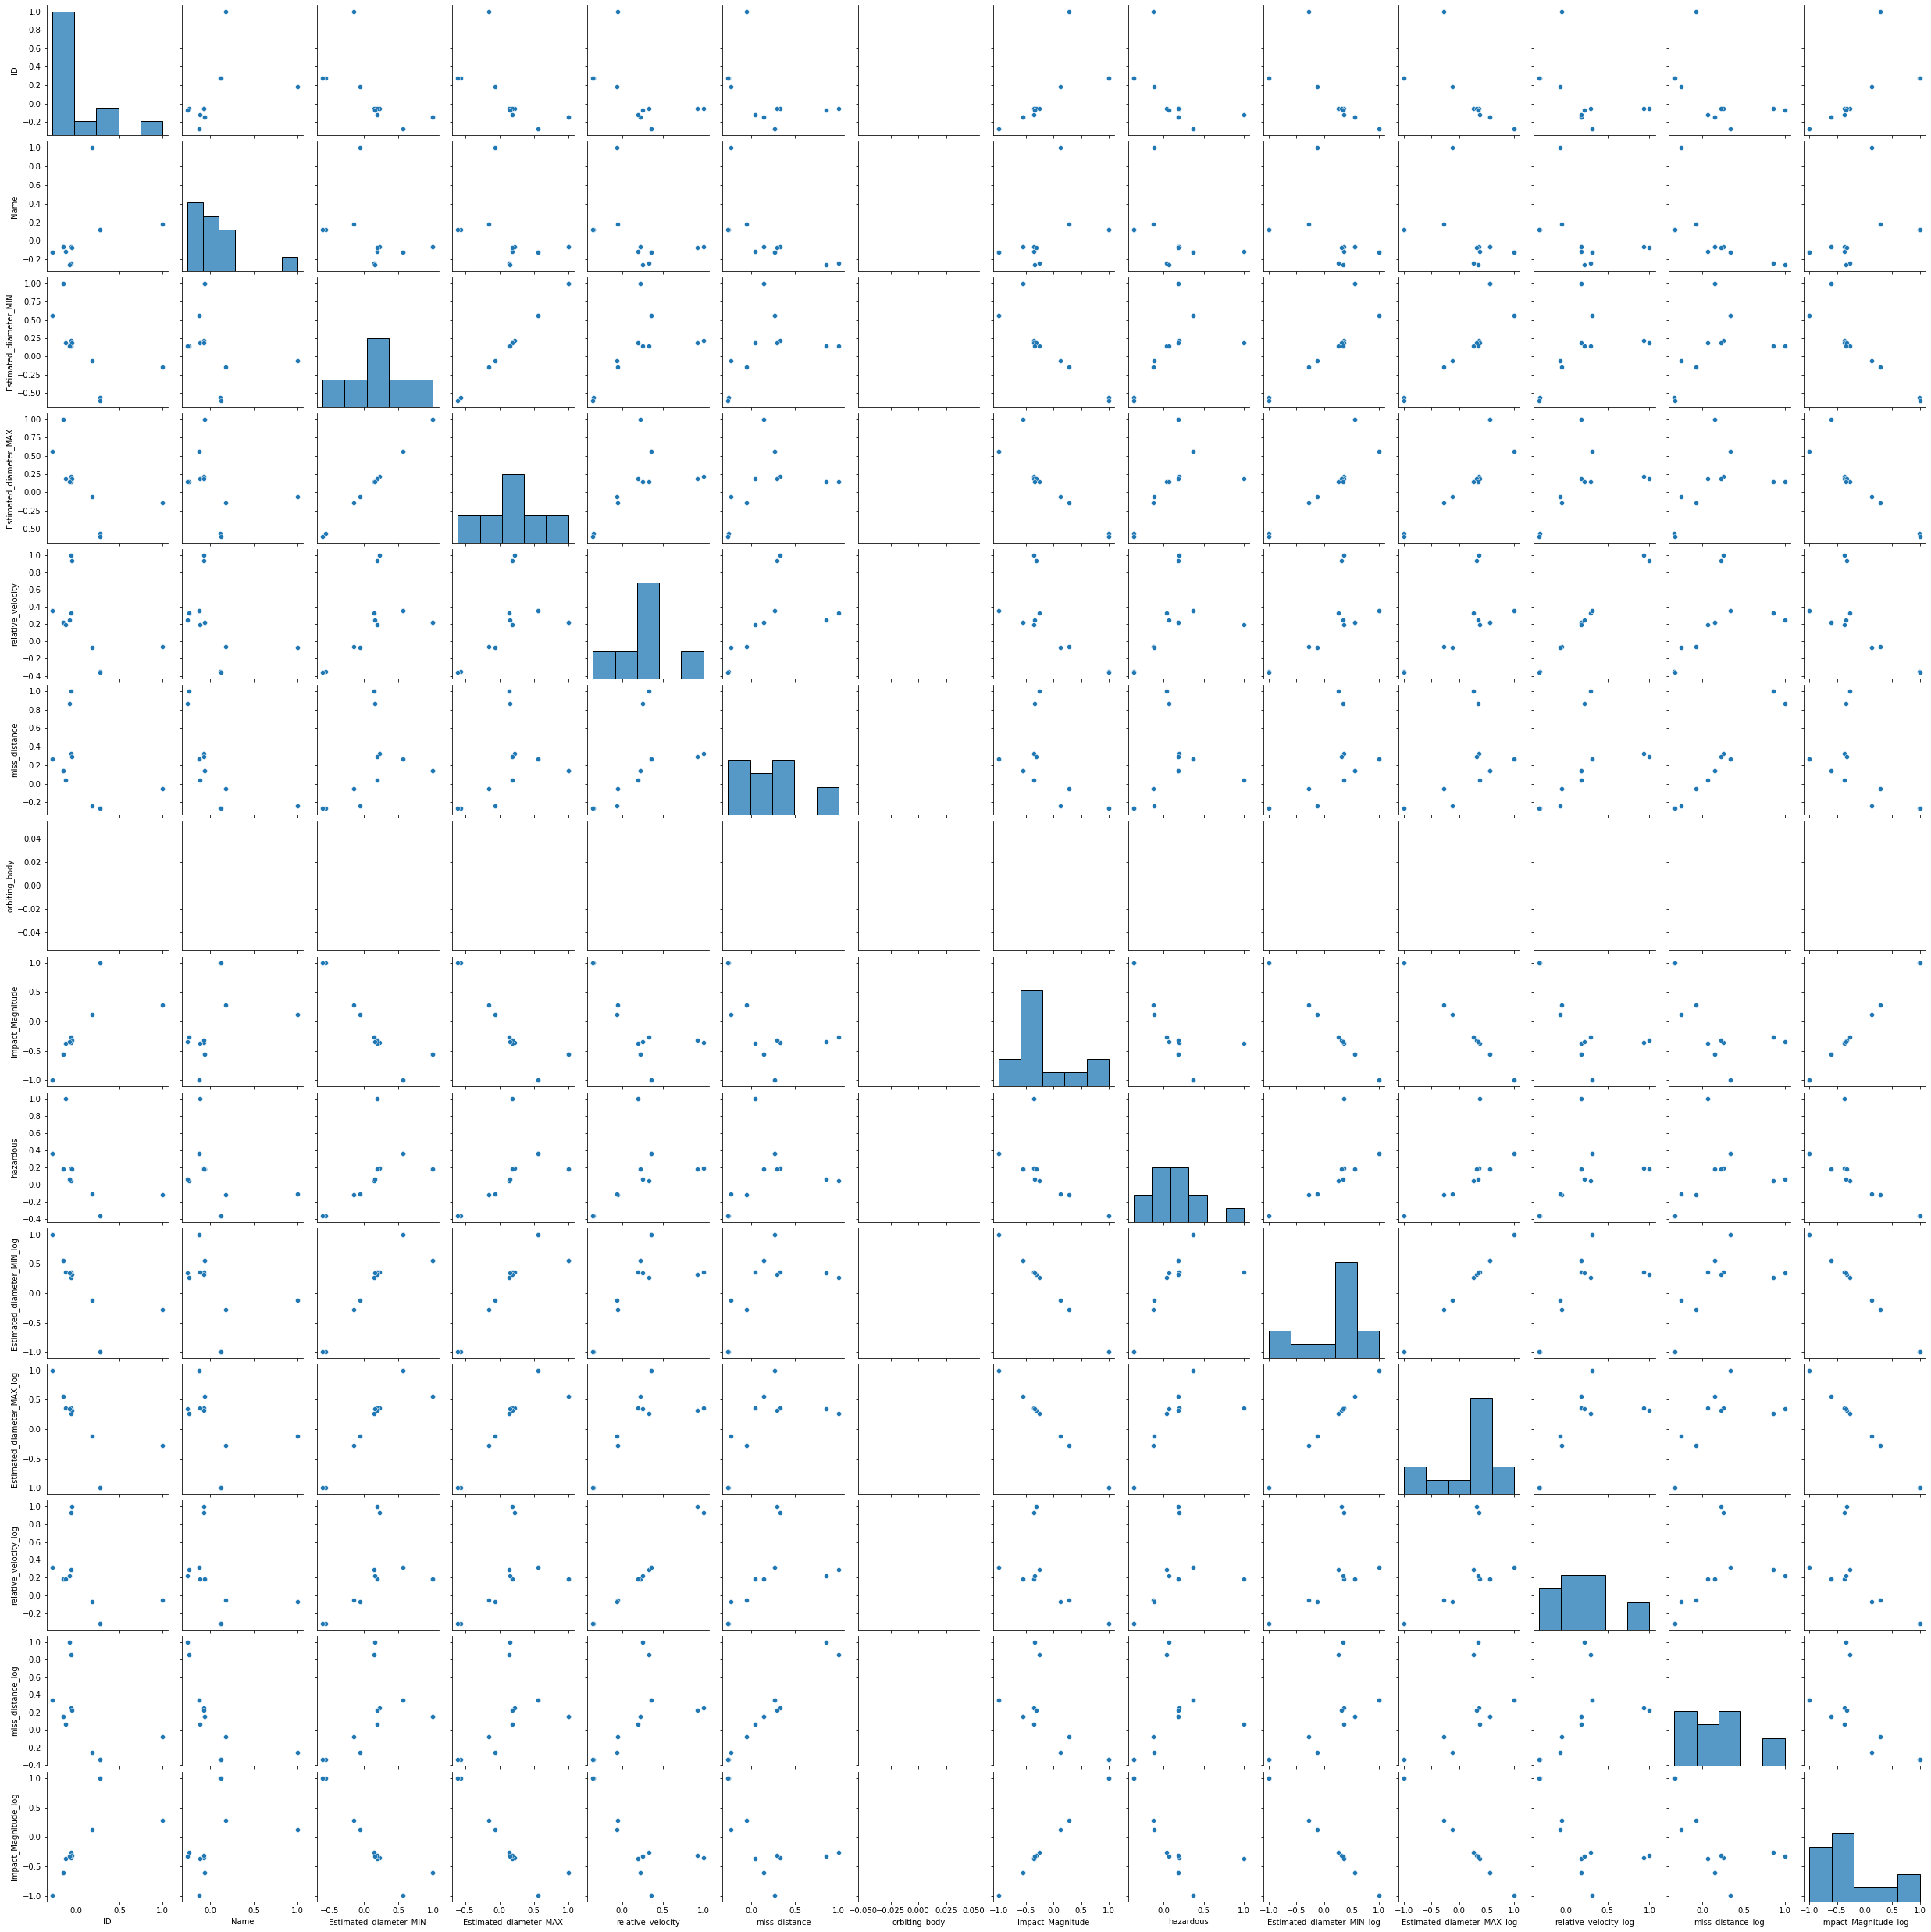

In [77]:
sns.pairplot(df.drop(['Monitored_by_Sentry'],axis=1).corr())
plt.show()

# **Heatmap**

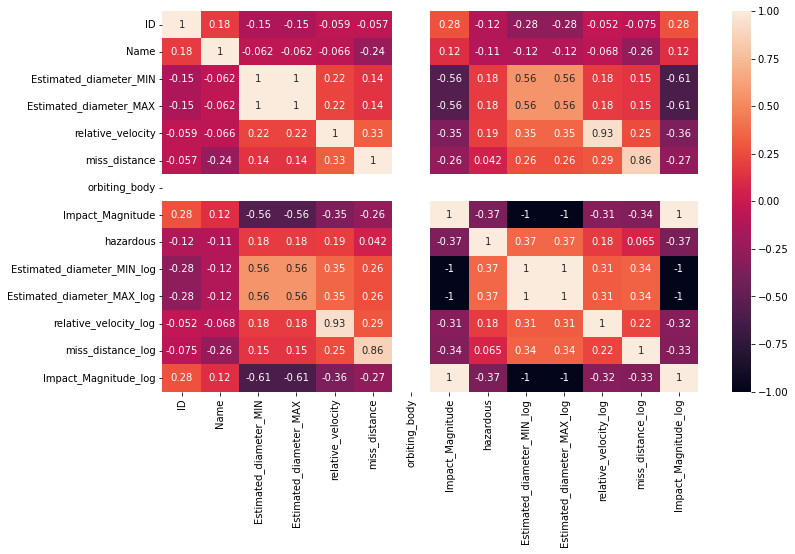

In [78]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Monitored_by_Sentry'],axis=1).corr(), annot = True)
plt.show()

# **Scatter plot**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

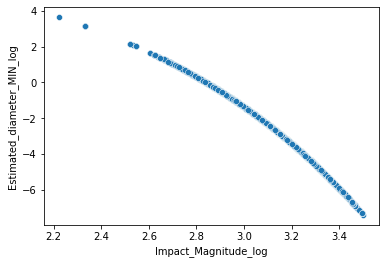

In [79]:
sns.scatterplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

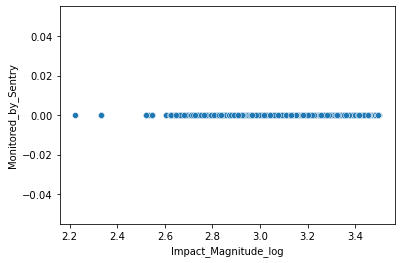

In [80]:
sns.scatterplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity', ylabel='Monitored_by_Sentry'>

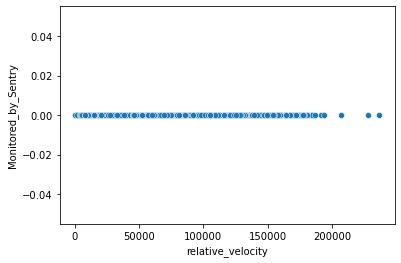

In [81]:
sns.scatterplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity_log', ylabel='miss_distance'>

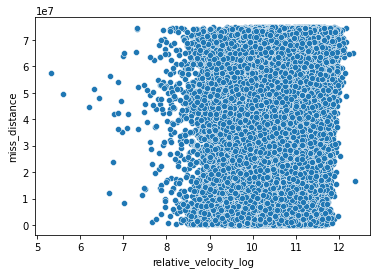

In [82]:
sns.scatterplot(x='relative_velocity_log',y='miss_distance',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

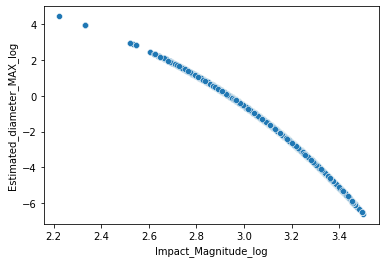

In [83]:
sns.scatterplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

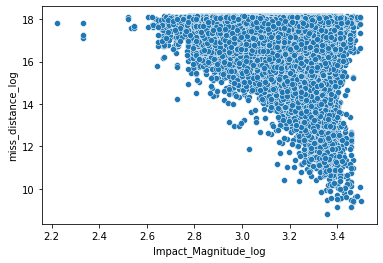

In [84]:
sns.scatterplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='miss_distance_log', ylabel='Estimated_diameter_MAX_log'>

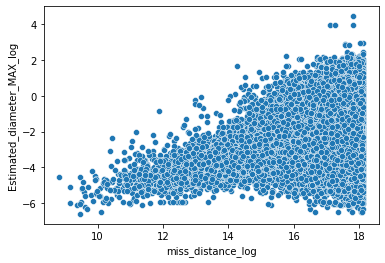

In [85]:
sns.scatterplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

# **LM plot**

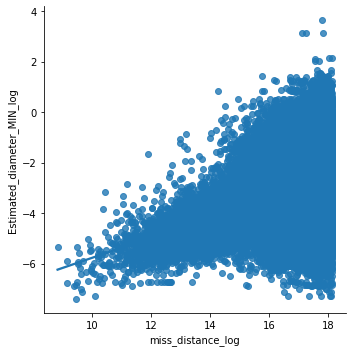

In [86]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MIN_log',data=df) 

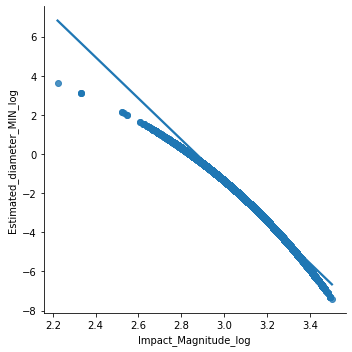

In [87]:
sns.lmplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

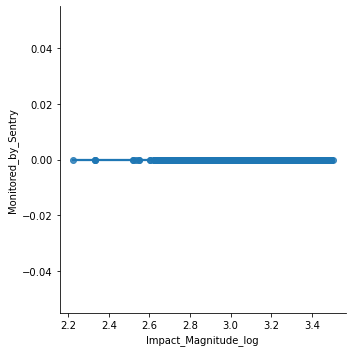

In [88]:
sns.lmplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

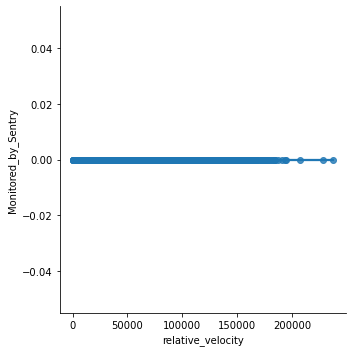

In [89]:
sns.lmplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

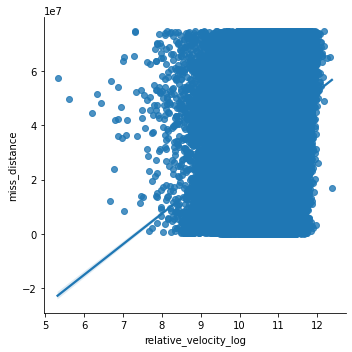

In [90]:
sns.lmplot(x='relative_velocity_log',y='miss_distance',data=df) 

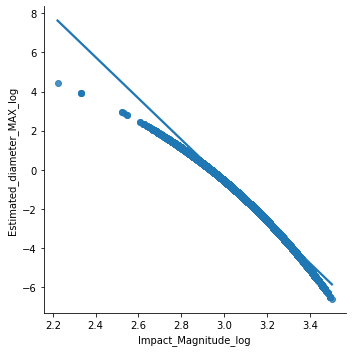

In [91]:
sns.lmplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

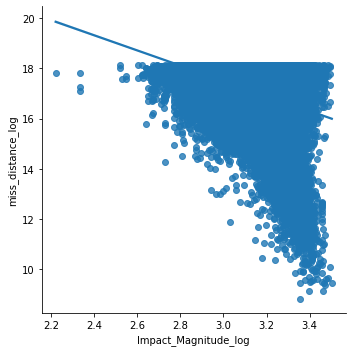

In [92]:
sns.lmplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

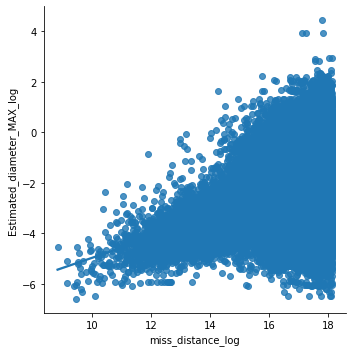

In [93]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

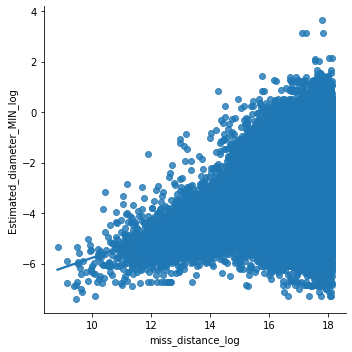

In [94]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MIN_log',data=df) 

# PHASE 2

# Model Training

In [95]:
#Assigning the 'hazardous' column from the existing dataframe df to 'y'
y = pd.DataFrame(df['hazardous'],columns = ['hazardous'])

In [96]:
y

,hazardous
0,0
1,1
2,0
3,0
4,1
...,...
90831,0
90832,0
90833,0
90834,0


In [97]:
x = df.drop(columns = ['hazardous'])

In [98]:
x

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,Estimated_diameter_MIN_log,Estimated_diameter_MAX_log,relative_velocity_log,miss_distance_log,Impact_Magnitude_log
0,2162635,0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0.180880,0.985598,9.515561,17.819926,2.817204
1,2277475,1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,-1.325011,-0.520292,11.206247,17.933541,2.995732
2,2512244,2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,-0.325689,0.479030,11.646220,17.723500,2.880882
3,3596030,3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,-2.338149,-1.533430,10.117159,17.051636,3.100092
4,3667127,4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,-1.366458,-0.561739,10.662838,17.650125,3.000222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,629,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,-3.627596,-2.822877,10.860515,16.325141,3.218876
90832,3837603,7599,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,-4.088113,-3.283394,10.738885,17.810425,3.258097
90833,54017201,19445,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,-3.443389,-2.638670,8.931527,17.161927,3.202746
90834,54115824,7737,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,-4.917044,-4.112325,11.144744,18.045144,3.325036


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

# K-Nearest Neighbors (KNN)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred  = knn.predict(X_test)

In [101]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[47407,  1798],
       [ 4390,   907]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)*100
print("Accuracy:",accuracy)

Accuracy: 88.64628820960698


In [104]:
# Compute precision, recall, and F1 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     49205
           1       0.34      0.17      0.23      5297

    accuracy                           0.89     54502
   macro avg       0.63      0.57      0.58     54502
weighted avg       0.86      0.89      0.87     54502



# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression(random_state=0).fit(X_train, y_train)
L_Regression=LR.predict(X_test)

In [106]:
#Confusion Matrix
confusion_matrix(y_test, L_Regression)

array([[49169,    36],
       [ 5264,    33]])

In [107]:
accuracy=accuracy_score(y_test, L_Regression)*100
print("Accuracy:",accuracy)

Accuracy: 90.27558621701955


In [108]:
# evaluate model on test set
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     49205
           1       0.48      0.01      0.01      5297

    accuracy                           0.90     54502
   macro avg       0.69      0.50      0.48     54502
weighted avg       0.86      0.90      0.86     54502



# Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(X_train, y_train)
Naive_bayes = clf.predict(X_test)

In [110]:
#Confusion Matrix
confusion_matrix(y_test, Naive_bayes)

array([[48003,  1202],
       [ 4832,   465]])

In [111]:
accuracy=accuracy_score(y_test, Naive_bayes)*100
print("Accuracy:",accuracy)

Accuracy: 88.92884664782945


In [112]:
# X_test and y_test are your test data
y_pred = clf.predict(X_test)

#Compute accuracy,precision, recall, and F1 score
precision_recall_fscore_support = classification_report(y_test, y_pred)

# Print the report
print(precision_recall_fscore_support)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     49205
           1       0.28      0.09      0.13      5297

    accuracy                           0.89     54502
   macro avg       0.59      0.53      0.54     54502
weighted avg       0.85      0.89      0.86     54502



# Decision Tree

In [113]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
trees = tree.DecisionTreeClassifier()
trees.fit(X_train, y_train)
Decision_Tree = trees.predict(X_test)

In [114]:
#Confusion Matrix
confusion_matrix(y_test, Decision_Tree)

array([[47189,  2016],
       [ 1931,  3366]])

In [115]:
#Compute accuracy,precision, recall, and F1 score
accuracy=accuracy_score(y_test, Decision_Tree)*100
precision = precision_score(y_test, Decision_Tree, average='weighted')*100
recall = recall_score(y_test, Decision_Tree, average='weighted')*100
f1 = f1_score(y_test, Decision_Tree, average='weighted')*100
print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 92.75806392425966
Precision: 92.81035182983491
Recall: 92.75806392425966
F1 score: 92.78375493412771


In [ ]:
#plot the decision tree
plt.figure(figsize=(25, 10))
plot_tree(trees, filled=True)
plt.show()

# Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=3)

NN.fit(X_train, y_train)
NN1 = NN.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, NN1)

In [ ]:
# assume that X_test and y_test are the test data and labels for the neural network model
NN1 = NN.predict(X_test)
accuracy=accuracy_score(y_test, NN1)*100
precision = precision_score(y_test, NN1, average='weighted')*100
recall = recall_score(y_test, NN1, average='weighted')*100
f1 = f1_score(y_test, NN1, average='weighted')*100
print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# References :

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB


https://scikit-learn.org/stable/modules/neural_networks_supervised


https://scikit-learn.org/stable/modules/tree

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier